In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")

In [10]:
import nltk
nltk.data.path.append("/media/sayantan/Personal/nltk_data")

In [139]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk import word_tokenize
stopwords = stopwords.words('english')

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [5]:
%matplotlib inline

In [7]:
data = pd.read_csv('./sentiment_train', sep='\t')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 2 columns):
sentiment    6918 non-null int64
text         6918 non-null object
dtypes: int64(1), object(1)
memory usage: 108.2+ KB


In [9]:
data.head()

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [13]:
data.text.str.split(" ")

0        [The, Da, Vinci, Code, book, is, just, awesome.]
1       [this, was, the, first, clive, cussler, i've, ...
2               [i, liked, the, Da, Vinci, Code, a, lot.]
3               [i, liked, the, Da, Vinci, Code, a, lot.]
4       [I, liked, the, Da, Vinci, Code, but, it, ulti...
5       [that's, not, even, an, exaggeration, ), and, ...
6       [I, loved, the, Da, Vinci, Code,, but, now, I,...
7       [i, thought, da, vinci, code, was, great,, sam...
8       [The, Da, Vinci, Code, is, actually, a, good, ...
9       [I, thought, the, Da, Vinci, Code, was, a, pre...
10      [The, Da, Vinci, Code, is, one, of, the, most,...
11      [The, Da, Vinci, Code, is, an, *, amazing, *, ...
12      [then, I, turn, on, the, light, and, the, radi...
13             [The, Da, Vinci, Code, was, REALLY, good.]
14                         [i, love, da, vinci, code....]
15                          [i, loved, da, vinci, code..]
16      [TO, NIGHT::, THE, DA, VINCI, CODE, AND, A, BE...
17      [THE, 

In [17]:
data.text.apply(lambda x: word_tokenize(x.lower()))

0       [the, da, vinci, code, book, is, just, awesome...
1       [this, was, the, first, clive, cussler, i, 've...
2             [i, liked, the, da, vinci, code, a, lot, .]
3             [i, liked, the, da, vinci, code, a, lot, .]
4       [i, liked, the, da, vinci, code, but, it, ulti...
5       [that, 's, not, even, an, exaggeration, ), and...
6       [i, loved, the, da, vinci, code, ,, but, now, ...
7       [i, thought, da, vinci, code, was, great, ,, s...
8       [the, da, vinci, code, is, actually, a, good, ...
9       [i, thought, the, da, vinci, code, was, a, pre...
10      [the, da, vinci, code, is, one, of, the, most,...
11      [the, da, vinci, code, is, an, *, amazing, *, ...
12      [then, i, turn, on, the, light, and, the, radi...
13           [the, da, vinci, code, was, really, good, .]
14                     [i, love, da, vinci, code, ..., .]
15                          [i, loved, da, vinci, code..]
16      [to, night, :, :, the, da, vinci, code, and, a...
17      [the, 

In [31]:
def clean_text(x):
    splchars = re.compile(r'[^A-Za-z ]',re.IGNORECASE)
    x = splchars.sub('', x)
    x = word_tokenize(x.lower())
    x = [w for w in x if w not in stopwords]
    return(' '.join(x))

In [33]:
data['text_clean'] = data.text.apply(lambda x: clean_text(x.lower()))

In [36]:
count_vec = CountVectorizer()

In [40]:
count_vec_dict = count_vec.fit(data.text)
count_vec_dict.get_feature_names()

['00',
 '007',
 '10',
 '10pm',
 '12',
 '16',
 '17',
 '1984',
 '1st',
 '200',
 '2007',
 '286',
 '2nd',
 '30',
 '31st',
 '33',
 '3333',
 '385',
 '50',
 '517',
 '648',
 '6th',
 '700',
 '7th',
 '8230',
 '9am',
 'aaron',
 'able',
 'abortion',
 'about',
 'abrams',
 'absolute',
 'absolutely',
 'absurd',
 'academy',
 'acceptable',
 'accompaniment',
 'according',
 'account',
 'achieved',
 'aching',
 'acne',
 'acoustic',
 'acting',
 'action',
 'actor',
 'actors',
 'actual',
 'actually',
 'adaptation',
 'add',
 'addition',
 'admired',
 'admiring',
 'adorable',
 'adore',
 'adult',
 'adversity',
 'afraid',
 'after',
 'afterschool',
 'afterwards',
 'again',
 'against',
 'ago',
 'agree',
 'agreed',
 'ah',
 'aimee',
 'ain',
 'aka',
 'al',
 'alarm',
 'all',
 'allegedly',
 'allegory',
 'almost',
 'along',
 'already',
 'alright',
 'also',
 'although',
 'altogether',
 'always',
 'am',
 'amazes',
 'amazing',
 'amazingly',
 'america',
 'amã',
 'an',
 'anatomy',
 'anax',
 'and',
 'ang',
 'angel',
 'angels',


In [41]:
reviews_text_vec = count_vec.transform(data.text)

In [46]:
reviews_text_vec.toarray().shape

(6918, 2132)

In [47]:
df_reviews = pd.DataFrame(reviews_text_vec.toarray())
df_reviews

,0,1,2,3,4,5,6,7,8,9,...,2122,2123,2124,2125,2126,2127,2128,2129,2130,2131
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df_reviews.columns = count_vec_dict.get_feature_names()

In [50]:
df_reviews[['just','awesome', 'nice']][:1]

,just,awesome,nice
0,1,1,0


In [51]:
feature_freq = np.sum(reviews_text_vec.toarray(), axis = 0)
feature_freq

array([ 1,  1,  4, ...,  1, 80,  1])

In [52]:
feature_df = pd.DataFrame({'Feature_Name':count_vec_dict.get_feature_names(), 'Frequency':feature_freq})
feature_df.sort_values('Frequency', ascending = False)

,Feature_Name,Frequency
1864,the,3306
93,and,2154
864,harry,2093
1466,potter,2093
355,code,2002
2009,vinci,2001
442,da,2001
1272,mountain,2000
259,brokeback,2000
1171,love,1624


In [54]:
from sklearn.feature_extraction import text

In [55]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [70]:
count_vec_v1 = CountVectorizer(stop_words=stopwords, max_df= .7, min_df=5, ngram_range=(1,2))

In [71]:
count_vec_dict = count_vec_v1.fit(data.text)

In [72]:
reviews_text_vec = count_vec_v1.transform(data.text)
df_reviews = pd.DataFrame(reviews_text_vec.toarray())
df_reviews.columns = count_vec_dict.get_feature_names()
df_reviews.head()

,absolutely,absolutely awesome,absolutely love,acceptable,aching,aching cock,acne,acne love,action,actually,...,would good,would like,wrong,yeah,yeah got,year,yes,yet,zen,zen da
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df_reviews.shape

(6918, 674)

In [74]:
reviews_text_vec.getnnz()

76751

# Train Test Split

In [75]:
from sklearn.naive_bayes import BernoulliNB

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
y = data.sentiment.values
X_train, X_test, y_train, y_test = train_test_split(df_reviews.values, y, train_size = 0.7, random_state = 42) 

In [78]:
X_train.shape

(4842, 674)

# Bayes Classifier

In [80]:
bayes_clf = BernoulliNB()
bayes_clf.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [81]:
pred = bayes_clf.predict(X_test)

# Performance

In [90]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, precision_recall_curve

confusion_matrix(y_test, pred, (1,0))

array([[1195,    8],
       [  47,  826]])

In [84]:
roc_auc_score(y_test, pred)

0.969756307970052

In [87]:
precision_score(y_test, pred)

0.962157809983897

In [89]:
recall_score(y_test, pred)

0.9933499584372403

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.99      0.95      0.97       873
          1       0.96      0.99      0.98      1203

avg / total       0.97      0.97      0.97      2076



# RF

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
rf = RandomForestClassifier(max_depth=6, n_estimators= 100)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

In [120]:
from sklearn.model_selection import GridSearchCV
paramList = {'n_estimators': [100],
            'max_depth': [6,9],
            'max_features':[.5, .8]}

In [121]:
rf = RandomForestClassifier()
gridSearch = GridSearchCV(cv=5, estimator=rf, param_grid=paramList, scoring='roc_auc')


In [122]:
gridSearch.fit(X_train, y_train)

In [126]:
pred = gridSearch.predict(X_test)

In [127]:
confusion_matrix(y_test, pred, (1,0))

array([[1169,   34],
       [  25,  848]])

In [128]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.96      0.97      0.97       873
          1       0.98      0.97      0.98      1203

avg / total       0.97      0.97      0.97      2076



In [131]:
gridSearch.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [134]:
gridSearch.grid_scores_

[mean: 0.99731, std: 0.00094, params: {'max_depth': 6, 'max_features': 0.5, 'n_estimators': 100},
 mean: 0.99587, std: 0.00331, params: {'max_depth': 6, 'max_features': 0.8, 'n_estimators': 100},
 mean: 0.99911, std: 0.00034, params: {'max_depth': 9, 'max_features': 0.5, 'n_estimators': 100},
 mean: 0.99821, std: 0.00096, params: {'max_depth': 9, 'max_features': 0.8, 'n_estimators': 100}]

In [136]:
featureImp = pd.DataFrame({'Feature_Name': df_reviews.columns, 'Importance':gridSearch.best_estimator_.feature_importances_})
featureImp.sort_values('Importance', ascending = False,inplace=True)                           
featureImp['cumsum'] = featureImp.Importance.cumsum()
featureImp

,Feature_Name,Importance,cumsum
332,love,0.238970,0.238970
30,awesome,0.222649,0.461619
340,loved,0.069540,0.531159
369,mission impossible,0.048463,0.579622
312,like harry,0.046522,0.626144
254,impossible,0.045872,0.672015
368,mission,0.044607,0.716623
42,beautiful,0.041903,0.758526
308,like,0.038628,0.797154
564,sucked,0.026407,0.823561


# STEMMING

In [142]:
stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()

def get_stemmed_words(doc):
    stemmed_words = [stemmer.stem(word) for word in analyzer(doc)]
    final_words = [word for word in stemmed_words if word not in stopwords]
    return final_words

In [145]:
get_stemmed_words('the player played')

['player', 'play']

In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec_v2 = TfidfVectorizer(tokenizer=get_stemmed_words, max_df=.7, min_df=5, ngram_range=(1,2))

In [150]:
tfidf_vec_v2.fit(data.text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.7, max_features=None, min_df=5,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function get_stemmed_words at 0x7f6c9cf72488>,
        use_idf=True, vocabulary=None)

In [151]:
tfidf_dict = list(tfidf_vec_v2.get_feature_names())
tfidf_dict

['absolut',
 'absolut awesom',
 'absolut love',
 'accept',
 'ach',
 'ach cock',
 'acn',
 'acn love',
 'action',
 'actual',
 'almost',
 'alreadi',
 'also',
 'also catcher',
 'also love',
 'alway',
 'alway know',
 'amaz',
 'angel',
 'angel demon',
 'anyon',
 'anyon say',
 'anyth',
 'anyway',
 'anyway whi',
 'appar',
 'around',
 'around blond',
 'ask',
 'ass',
 'aw',
 'aw movi',
 'award',
 'award remind',
 'awesom',
 'awesom book',
 'awesom care',
 'awesom movi',
 'awesom stori',
 'awesom wait',
 'back',
 'bad',
 'ball',
 'beauti',
 'beauti movi',
 'becaus',
 'becaus hate',
 'becaus love',
 'becaus never',
 'becaus one',
 'becaus outshin',
 'becaus type',
 'becaus would',
 'becom',
 'becom accept',
 'befor',
 'begin',
 'best',
 'better',
 'better know',
 'better read',
 'big',
 'big time',
 'bit',
 'bitch',
 'black',
 'black guy',
 'blond',
 'blond rock',
 'bobbypin',
 'bobbypin insan',
 'bogu',
 'bogu inaccur',
 'bonker',
 'book',
 'book also',
 'bore',
 'brokeback',
 'brokeback mountain

In [152]:
len(tfidf_dict)

702

- Rest are same as above

# DL for Text Processing

In [153]:
data = pd.read_csv('./labeledTrainData.tsv', sep='\t')

In [154]:
data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [186]:
from keras.preprocessing import text, sequence

In [164]:
tokenizer = text.Tokenizer(num_words=20000)
tokenizer.fit_on_texts(data.review)

In [165]:
tokenizer.word_counts

OrderedDict([('with', 44122),
             ('all', 23953),
             ('this', 75974),
             ('stuff', 1171),
             ('going', 4094),
             ('down', 3707),
             ('at', 23507),
             ('the', 336148),
             ('moment', 1104),
             ('mj', 30),
             ("i've", 3342),
             ('started', 963),
             ('listening', 187),
             ('to', 135708),
             ('his', 29366),
             ('music', 3043),
             ('watching', 4600),
             ('odd', 579),
             ('documentary', 945),
             ('here', 5494),
             ('and', 164097),
             ('there', 15735),
             ('watched', 2236),
             ('wiz', 10),
             ('moonwalker', 24),
             ('again', 4000),
             ('maybe', 2341),
             ('i', 77142),
             ('just', 17759),
             ('want', 3693),
             ('get', 9269),
             ('a', 163040),
             ('certain', 764),
             ('ins

In [166]:
imdb_seq_df = tokenizer.texts_to_sequences(data.review)

In [167]:
imdb_seq_df[:10]

[[16,
  29,
  11,
  535,
  167,
  177,
  30,
  1,
  558,
  16,
  10086,
  204,
  642,
  2615,
  5,
  24,
  225,
  146,
  1,
  1028,
  659,
  130,
  2,
  47,
  293,
  1,
  19499,
  2,
  293,
  11585,
  171,
  276,
  10,
  40,
  178,
  5,
  76,
  3,
  810,
  2616,
  80,
  11,
  229,
  34,
  10,
  194,
  13,
  63,
  643,
  8,
  1,
  4252,
  40,
  5,
  276,
  94,
  53,
  58,
  327,
  723,
  26,
  6,
  2512,
  39,
  1351,
  11585,
  6,
  170,
  5034,
  170,
  788,
  19,
  60,
  10,
  374,
  167,
  5,
  64,
  30,
  1,
  434,
  51,
  9,
  13,
  1816,
  622,
  46,
  4,
  9,
  44,
  1299,
  3432,
  41,
  544,
  946,
  1,
  3513,
  2,
  79,
  1,
  574,
  746,
  4,
  1664,
  23,
  75,
  7,
  7,
  2006,
  1156,
  18,
  4,
  261,
  11,
  6,
  29,
  41,
  485,
  1878,
  35,
  891,
  22,
  2588,
  37,
  10086,
  8,
  550,
  92,
  22,
  23,
  167,
  5,
  780,
  11,
  2,
  166,
  9,
  354,
  46,
  200,
  680,
  10086,
  32,
  15,
  5,
  1,
  228,
  4,
  11,
  17,
  18,
  10086,
  2,
  88,
  4,
  24,
  

In [181]:
np.mean(list(map(lambda x: len(x), imdb_seq_df)))+2*np.std(list(map(lambda x: len(x), imdb_seq_df)))

572.0537887630941

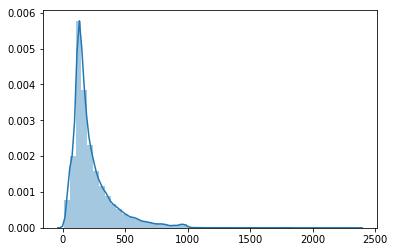

In [184]:
sns.distplot(list(map(lambda x: len(x), imdb_seq_df)))

In [193]:
train_seq = sequence.pad_sequences(imdb_seq_df, 200, truncating='pre', padding='pre')

In [189]:
y = data.sentiment

# Dense DN - Not Done right, Input should be TFIDF / COUNTVEC and not padded Sequence

In [194]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [198]:
model_v1 = Sequential()
model_v1.add(Dense(256, input_shape = (200,)))
model_v1.add(Activation('relu'))
model_v1.add(Dense(32))
model_v1.add(Activation('relu'))
model_v1.add(Dense(1))
model_v1.add(Activation('sigmoid'))

In [199]:
model_v1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               51456     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                8224      
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 59,713
Trainable params: 59,713
Non-trainable params: 0
_________________________________________________________________


In [200]:
from keras.optimizers import Adam
optim = Adam()
model_v1.compile(optimizer=optim, loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [206]:
BATCH_SIZE = 64
EPOCHS = 10

In [209]:
x_train_seq, x_test_seq, y_train, y_test = train_test_split(train_seq, y, train_size = 0.8, random_state = 42) 

In [210]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

checkpoint = ModelCheckpoint('./chkptr.hdf5', monitor='val_loss', verbose=2, save_best_only=True, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, min_lr=0.0001, verbose=2)
earlystopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=2, verbose=2, mode='auto')


In [211]:
model_v1.fit(x_train_seq, y_train, validation_data=(x_test_seq, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE,
             callbacks = [checkpoint, earlystopping, reduce_lr])

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 4s - loss: 7.9765 - acc: 0.4997 - val_loss: 7.9106 - val_acc: 0.5038
Epoch 2/10
20000/20000 [==============================] - 1s - loss: 7.9863 - acc: 0.4990 - val_loss: 7.9106 - val_acc: 0.5038
Epoch 3/10
19520/20000 [============================>.] - ETA: 0s - loss: 7.9802 - acc: 0.4994Epoch 00002: val_loss did not improve

Epoch 00002: reducing learning rate to 0.0005000000237487257.
20000/20000 [==============================] - 1s - loss: 7.9863 - acc: 0.4990 - val_loss: 7.9106 - val_acc: 0.5038
Epoch 4/10
19840/20000 [============================>.] - ETA: 0s - loss: 7.9905 - acc: 0.4988Epoch 00003: val_loss did not improve

Epoch 00003: reducing learning rate to 0.0002500000118743628.
20000/20000 [==============================] - 1s - loss: 7.9863 - acc: 0.4990 - val_loss: 7.9106 - val_acc: 0.5038
Epoch 00003: early stopping


# Embedding Matrix

## IMP why we need one more word in the Matrix and how to process it

In the method fit_on_texts of Tokenizer class (keras.preprocessing.text.Tokenizer - line 209), there is a comment shown below on line 4:

```
wcounts = list(self.word_counts.items())
wcounts.sort(key=lambda x: x[1], reverse=True)
sorted_voc = [wc[0] for wc in wcounts]
# note that index 0 is reserved, never assigned to an existing word
self.word_index = dict(list(zip(sorted_voc, list(range(1, len(sorted_voc) + 1)))))
```
I am interested for what is 0 reserved for? The only logical answer, implied from the comment as well, would be the uknown word token (given by parameter oov_token), but this is not true. The index of oov_token is 1 + word_count from the input texts. If this is somehow a mistake, and the comment is a legacy which is out of order, then I suggest index 0 becomes reserved for the oov_token.

Because if you use the pad_sequence to process the sequence, you will find the 0 is used as the padding value. In order to distinguish between PAD and UNKNOWN, keras use `word_count+1` as the index of UNKNOWN.

```
num_words = 3
tk = Tokenizer(num_words=num_words+1, oov_token='UNK')
texts = ["my name is far faraway asdasd", "my name is","your name is"]
tk.fit_on_texts(texts)
# see #8092 below why I do these two line
tk.word_index = {e:i for e,i in tk.word_index.items() if i <= num_words} # <= because tokenizer is 1 indexed
tk.word_index[tk.oov_token] = num_words + 1 
print(tk.word_index)
print(tk.texts_to_sequences(texts))
```

# Learning Self Embeddings

In [227]:
c_embedding_matrix = np.random.rand(nb_words,8)

In [232]:
from keras.layers import Embedding, Flatten

In [238]:
model_v1 = Sequential()
model_v1.add(Embedding(20000,8, input_shape = (200,), weights=[c_embedding_matrix], trainable=True))
model_v1.add(Flatten())
model_v1.add(Dense(800))
model_v1.add(Activation('relu'))
model_v1.add(Dense(800))
model_v1.add(Activation('relu'))
model_v1.add(Dense(1))
model_v1.add(Activation('sigmoid'))

In [239]:
optim = Adam()
model_v1.compile(optimizer=optim, loss='binary_crossentropy', metrics=['accuracy'])
model_v1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 200, 8)            160000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 800)               1280800   
_________________________________________________________________
activation_13 (Activation)   (None, 800)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 800)               640800    
_________________________________________________________________
activation_14 (Activation)   (None, 800)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 801       
__________

In [240]:
checkpoint = ModelCheckpoint('./chkptr.hdf5', monitor='val_loss', verbose=2, save_best_only=True, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, min_lr=0.0001, verbose=2)
earlystopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=2, verbose=2, mode='auto')

model_v1.fit(x_train_seq, y_train, validation_data=(x_test_seq, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE,
             callbacks = [checkpoint, earlystopping, reduce_lr])

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 15s - loss: 0.7175 - acc: 0.4969 - val_loss: 0.6917 - val_acc: 0.5226
Epoch 2/10
20000/20000 [==============================] - 12s - loss: 0.6936 - acc: 0.5010 - val_loss: 0.6932 - val_acc: 0.4960
Epoch 3/10
19904/20000 [============================>.] - ETA: 0s - loss: 0.6932 - acc: 0.4992Epoch 00002: val_loss did not improve

Epoch 00002: reducing learning rate to 0.0005000000237487257.
20000/20000 [==============================] - 12s - loss: 0.6932 - acc: 0.4991 - val_loss: 0.6932 - val_acc: 0.4962
Epoch 4/10
19904/20000 [============================>.] - ETA: 0s - loss: 0.6932 - acc: 0.4957Epoch 00003: val_loss did not improve

Epoch 00003: reducing learning rate to 0.0002500000118743628.
20000/20000 [==============================] - 12s - loss: 0.6932 - acc: 0.4964 - val_loss: 0.6932 - val_acc: 0.4960
Epoch 00003: early stopping


# Using GLOVE Embeddings

In [191]:
EMBEDDING_FILE_GLOVE='../../../data-kaggle/ref/pretrained-models/glove.840B.300d.txt'
#EMBEDDING_FILE_GLOVE
def get_coefs(word, *arr): return word, np.asarray(arr, dtype='float32')
embeddings_index_tw = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE_GLOVE,encoding='utf-8'))

In [219]:
word_index = tokenizer.word_index
nb_words = min(20000, len(word_index))
embedding_matrix = np.random.rand(nb_words,300)
embedding_matrix.shape

(20000, 300)

In [220]:
def embed_word(embedding_matrix,i,word):
    embedding_vector_ft = embeddings_index_tw.get(word)
    if embedding_vector_ft is not None: 
        embedding_matrix[i,:300] = embedding_vector_ft
# Glove vector is used by itself if there is no glove vector but not the other way around.
for word, i in word_index.items():
    
    if i >= 20000: continue
        
    if embeddings_index_tw.get(word) is not None:
        embed_word(embedding_matrix,i,word)

In [241]:
model_v1 = Sequential()
model_v1.add(Embedding(20000,300, input_shape = (200,), weights=[embedding_matrix], trainable=True))
model_v1.add(Flatten())
model_v1.add(Dense(800))
model_v1.add(Activation('relu'))
model_v1.add(Dense(800))
model_v1.add(Activation('relu'))
model_v1.add(Dense(1))
model_v1.add(Activation('sigmoid'))

optim = Adam()
model_v1.compile(optimizer=optim, loss='binary_crossentropy', metrics=['accuracy'])
model_v1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 200, 300)          6000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 60000)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 800)               48000800  
_________________________________________________________________
activation_16 (Activation)   (None, 800)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 800)               640800    
_________________________________________________________________
activation_17 (Activation)   (None, 800)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 801       
__________

In [244]:
checkpoint = ModelCheckpoint('./chkptr.hdf5', monitor='val_loss', verbose=2, save_best_only=True, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, min_lr=0.0001, verbose=2)
earlystopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=2, verbose=2, mode='auto')

model_v1.fit(x_train_seq, y_train, validation_data=(x_test_seq, y_test), epochs=2, batch_size=256,
             callbacks = [checkpoint, earlystopping, reduce_lr])

Train on 20000 samples, validate on 5000 samples
Epoch 1/2
20000/20000 [==============================] - 121s - loss: 0.3729 - acc: 0.8311 - val_loss: 0.7751 - val_acc: 0.7118
Epoch 2/2
20000/20000 [==============================] - 121s - loss: 0.1559 - acc: 0.9399 - val_loss: 0.6353 - val_acc: 0.7870


# RNN with custom Embeddings

In [246]:
from keras.layers import SimpleRNN

model_v1 = Sequential()
model_v1.add(Embedding(20000,8, input_shape = (200,), weights=[c_embedding_matrix], trainable=True))
model_v1.add(SimpleRNN(32))
model_v1.add(Dense(200))
model_v1.add(Activation('relu'))
model_v1.add(Dense(1))
model_v1.add(Activation('sigmoid'))
model_v1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_v1.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 200, 8)            160000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                1312      
_________________________________________________________________
dense_21 (Dense)             (None, 200)               6600      
_________________________________________________________________
activation_19 (Activation)   (None, 200)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 201       
_________________________________________________________________
activation_20 (Activation)   (None, 1)                 0         
Total params: 168,113
Trainable params: 168,113
Non-trainable params:

In [247]:
checkpoint = ModelCheckpoint('./chkptr.hdf5', monitor='val_loss', verbose=2, save_best_only=True, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, min_lr=0.0001, verbose=2)
earlystopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=2, verbose=2, mode='auto')

model_v1.fit(x_train_seq, y_train, validation_data=(x_test_seq, y_test), epochs=2, batch_size=256,
             callbacks = [checkpoint, earlystopping, reduce_lr])

Train on 20000 samples, validate on 5000 samples
Epoch 1/2
20000/20000 [==============================] - 12s - loss: 0.6929 - acc: 0.5177 - val_loss: 0.6871 - val_acc: 0.5558
Epoch 2/2
20000/20000 [==============================] - 9s - loss: 0.6683 - acc: 0.5893 - val_loss: 0.6427 - val_acc: 0.6242


# RNN with GLOVE Embeddings

In [251]:
from keras.layers import SimpleRNN

model_v1 = Sequential()
model_v1.add(Embedding(20000,300, input_shape = (200,), weights=[embedding_matrix], trainable=False))
model_v1.add(SimpleRNN(32))
model_v1.add(Dense(200))
model_v1.add(Activation('relu'))
model_v1.add(Dense(1))
model_v1.add(Activation('sigmoid'))
model_v1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_v1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 200, 300)          6000000   
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                10656     
_________________________________________________________________
dense_25 (Dense)             (None, 200)               6600      
_________________________________________________________________
activation_23 (Activation)   (None, 200)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 201       
_________________________________________________________________
activation_24 (Activation)   (None, 1)                 0         
Total params: 6,017,457
Trainable params: 17,457
Non-trainable params: 6,000,000
_____________________________________________________________

In [252]:
checkpoint = ModelCheckpoint('./chkptr.hdf5', monitor='val_loss', verbose=2, save_best_only=True, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, min_lr=0.0001, verbose=2)
earlystopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=2, verbose=2, mode='auto')

model_v1.fit(x_train_seq, y_train, validation_data=(x_test_seq, y_test), epochs=2, batch_size=256,
             callbacks = [checkpoint, earlystopping, reduce_lr])

Train on 20000 samples, validate on 5000 samples
Epoch 1/2
20000/20000 [==============================] - 15s - loss: 0.6465 - acc: 0.6069 - val_loss: 0.5546 - val_acc: 0.7352
Epoch 2/2
20000/20000 [==============================] - 13s - loss: 0.5237 - acc: 0.7542 - val_loss: 0.4894 - val_acc: 0.7738


# LSTM with GLOVE Embeddings

In [255]:
from keras.layers import LSTM

model_v1 = Sequential()
model_v1.add(Embedding(20000,300, input_shape = (200,), weights=[embedding_matrix], trainable=False, name='e1'))
model_v1.add(LSTM(32))
model_v1.add(Dense(200))
model_v1.add(Activation('relu'))
model_v1.add(Dense(1))
model_v1.add(Activation('sigmoid'))
model_v1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_v1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
e1 (Embedding)               (None, 200, 300)          6000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                42624     
_________________________________________________________________
dense_29 (Dense)             (None, 200)               6600      
_________________________________________________________________
activation_27 (Activation)   (None, 200)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 201       
_________________________________________________________________
activation_28 (Activation)   (None, 1)                 0         
Total params: 6,049,425
Trainable params: 49,425
Non-trainable params: 6,000,000
_____________________________________________________________

In [256]:
checkpoint = ModelCheckpoint('./chkptr.hdf5', monitor='val_loss', verbose=2, save_best_only=True, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, min_lr=0.0001, verbose=2)
earlystopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=2, verbose=2, mode='auto')

model_v1.fit(x_train_seq, y_train, validation_data=(x_test_seq, y_test), epochs=2, batch_size=256,
             callbacks = [checkpoint, earlystopping, reduce_lr])

Train on 20000 samples, validate on 5000 samples
Epoch 1/2
20000/20000 [==============================] - 53s - loss: 0.5567 - acc: 0.6986 - val_loss: 0.4064 - val_acc: 0.8250
Epoch 2/2
20000/20000 [==============================] - 48s - loss: 0.4027 - acc: 0.8261 - val_loss: 0.3746 - val_acc: 0.8392


# Word Embeddings from NN

In [258]:
word_embed_NN = model_v1.get_layer('e1').get_weights()
word_embed_NN

[array([[ 0.20941243,  0.55989087,  0.04704442, ...,  0.01127967,
          0.6453959 ,  0.3686844 ],
        [ 0.27204   , -0.06203   , -0.1884    , ...,  0.13015   ,
         -0.18317   ,  0.1323    ],
        [-0.18567   ,  0.066008  , -0.25209   , ..., -0.023452  ,
          0.12302   ,  0.3312    ],
        ...,
        [ 0.6802803 ,  0.20692366,  0.9550998 , ...,  0.39212462,
          0.12148989,  0.6053277 ],
        [ 0.35188   ,  0.11191   , -0.35518   , ..., -0.23722   ,
         -0.15342   ,  0.050089  ],
        [-0.26544   ,  0.4729    ,  0.17745   , ..., -0.6101    ,
         -0.35386   , -0.15384   ]], dtype=float32)]

In [260]:
tokenizer.word_index['good']

49

In [264]:
word_embed_NN[0][49]


array([-0.42625  ,  0.4431   , -0.34517  , -0.1326   , -0.05816  ,
        0.052598 ,  0.21575  , -0.36721  , -0.04519  ,  2.2444   ,
       -0.29089  ,  0.1667   , -0.052051 ,  0.15964  , -0.42759  ,
       -0.11147  , -0.14951  ,  1.18     , -0.19603  ,  0.15592  ,
       -0.06112  , -0.011576 ,  0.26849  , -0.30175  , -0.055796 ,
        0.12116  ,  0.010542 , -0.18065  ,  0.23281  , -0.26367  ,
        0.11032  ,  0.06216  ,  0.015019 , -0.10687  ,  0.098486 ,
        0.048457 ,  0.33355  , -0.16177  , -0.28503  , -0.28655  ,
       -0.11245  ,  0.12417  , -0.24975  , -0.2008   ,  0.26034  ,
        0.25208  , -0.17841  ,  0.15395  , -0.19799  , -0.22644  ,
       -0.074088 ,  0.50289  ,  0.32105  , -0.034766 ,  0.16543  ,
        0.057095 , -0.20973  ,  0.098376 ,  0.035058 , -0.023057 ,
       -0.11736  , -0.51327  , -0.020999 ,  0.39962  ,  0.30533  ,
       -0.38839  ,  0.0026097,  0.29022  ,  0.017045 ,  0.063961 ,
        0.10789  ,  0.29013  ,  0.061732 ,  0.068231 , -0.0140

In [268]:
from scipy.spatial.distance import cdist, cosine

# Word Similarity

In [273]:
def get_distance(word1, word2):
    first_1 = tokenizer.word_index[word1]
    first_2 = tokenizer.word_index[word2]
    
    return 1- cdist([word_embed_NN[0][first_1]], [word_embed_NN[0][first_2]], metric='correlation')
    

In [274]:
get_distance('great', 'excellent')

array([[0.7710065]])

In [280]:
get_distance('honest', 'honesty')

array([[0.71685776]])